Mean final portfolio value: $29,926.45
1% quantile of final portfolio value: $27,713.17


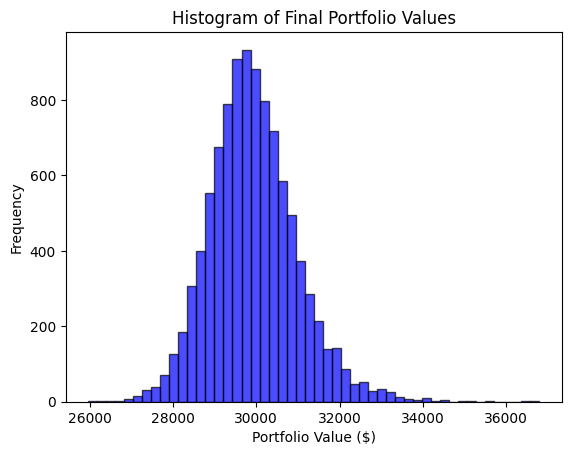

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'fonddata.csv'
fonddata = pd.read_csv(file_path, delimiter=';', thousands=',')

# Extract closing prices and calculate returns
fonddata['Date'] = pd.to_datetime(fonddata['Date'])
closing_prices = fonddata['Closing price'].values
returns = np.diff(closing_prices) / closing_prices[:-1]  # Percentage changes

# Step 1: Define simulation parameters
n_years = 30
n_simulations = 10000  # Number of simulations
investment = 1000  # Annual investment
default_rf_rate = 0.01  # Risk-free annual return

# Step 2: Create empirical distribution of returns
def simulate_annual_returns(empirical_returns, n_years, n_simulations):
    np.random.seed(42)  # For reproducibility
    simulated_returns = np.random.choice(empirical_returns, size=(n_simulations, n_years), replace=True)
    return simulated_returns

# Step 3: Simulate portfolio value
def simulate_portfolio(empirical_returns, n_years, n_simulations, investment, default_rf_rate):
    simulated_returns = simulate_annual_returns(empirical_returns, n_years, n_simulations)
    portfolio_values = np.zeros((n_simulations, n_years + 1))

    for sim in range(n_simulations):
        for year in range(1, n_years + 1):
            annual_return = simulated_returns[sim, year - 1]
            portfolio_values[sim, year] = (
                portfolio_values[sim, year - 1] + investment
            ) * (1 + annual_return)

    return portfolio_values

# Run simulation
portfolio_values = simulate_portfolio(returns, n_years, n_simulations, investment, default_rf_rate)

# Step 4: Analyze results
final_values = portfolio_values[:, -1]
mean_value = np.mean(final_values)
quantile_1_percent = np.quantile(final_values, 0.01)

# Display results
print(f"Mean final portfolio value: ${mean_value:,.2f}")
print(f"1% quantile of final portfolio value: ${quantile_1_percent:,.2f}")

# Step 5: Plot histogram
plt.hist(final_values, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Final Portfolio Values')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.show()


Mean final portfolio value: $32,680.77
1% quantile of final portfolio value: $31,600.99


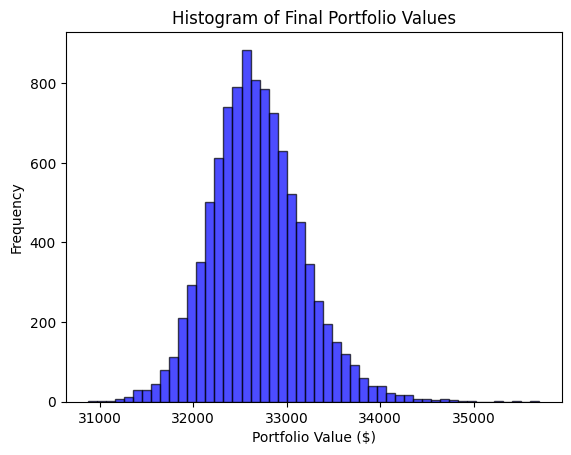

Mean final portfolio value: $34,879.84
1% quantile of final portfolio value: $34,748.50


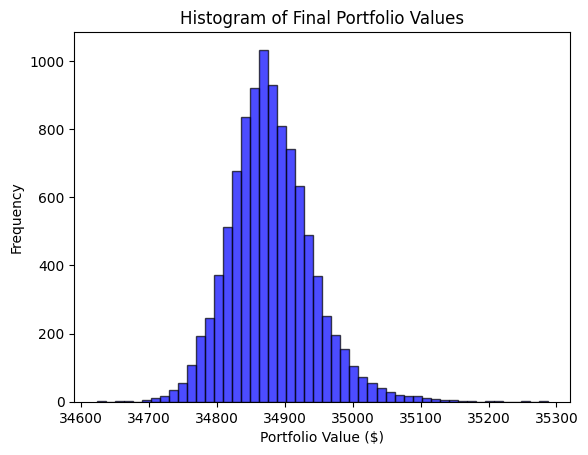

Mean final portfolio value: $10,718,857,284.03
1% quantile of final portfolio value: $9,483,888,392.57


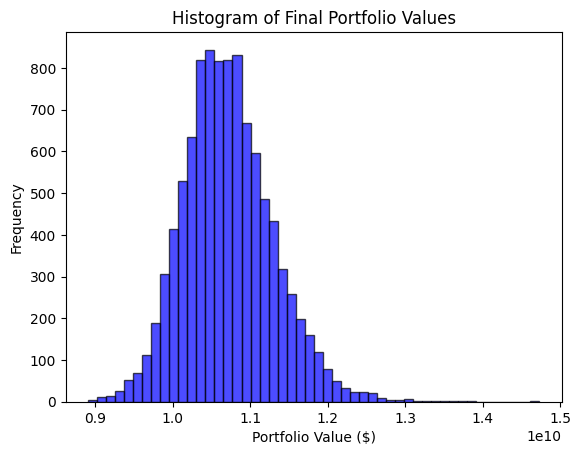

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'fonddata.csv'
fonddata = pd.read_csv(file_path, delimiter=';', thousands=',')

# Extract closing prices and calculate returns
fonddata['Date'] = pd.to_datetime(fonddata['Date'])
closing_prices = fonddata['Closing price'].values
returns = np.diff(closing_prices) / closing_prices[:-1]  # Percentage changes

# Step 1: Define simulation parameters
n_years = 30
n_simulations = 10000  # Number of simulations
investment = 1000  # Annual investment
default_rf_rate = 0.01  # Risk-free annual return

def simulate_annual_returns(empirical_returns, n_years, n_simulations):
    np.random.seed(42)  # For reproducibility
    simulated_returns = np.random.choice(empirical_returns, size=(n_simulations, n_years), replace=True)
    return simulated_returns

# Part b: Simulate portfolio with rebalancing strategy
def simulate_portfolio_with_rebalancing(empirical_returns, n_years, n_simulations, investment, p, c):
    simulated_returns = simulate_annual_returns(empirical_returns, n_years, n_simulations)
    portfolio_values = np.zeros((n_simulations, n_years + 1))

    for sim in range(n_simulations):
        for year in range(1, n_years + 1):
            weight_stocks = p * (1 - c * (year - 1) / n_years)
            annual_return = weight_stocks * simulated_returns[sim, year - 1] + (1 - weight_stocks) * default_rf_rate
            portfolio_values[sim, year] = (
                portfolio_values[sim, year - 1] + investment
            ) * (1 + annual_return)

    return portfolio_values

# Part c: Traditional life insurance strategy
def simulate_traditional_life_insurance(empirical_returns, n_years, n_simulations, investment, guaranteed_rate):
    simulated_returns = simulate_annual_returns(empirical_returns, n_years, n_simulations)
    portfolio_values = np.zeros((n_simulations, n_years + 1))
    guaranteed_values = np.zeros(n_years + 1)

    for year in range(1, n_years + 1):
        guaranteed_values[year] = guaranteed_values[year - 1] + investment * np.exp(guaranteed_rate * year)

    for sim in range(n_simulations):
        for year in range(1, n_years + 1):
            risk_free_investment = guaranteed_values[year] * np.exp(-guaranteed_rate)
            risky_investment = (
                portfolio_values[sim, year - 1] + investment - risk_free_investment
            )
            annual_return = simulated_returns[sim, year - 1]
            portfolio_values[sim, year] = risk_free_investment * (1 + default_rf_rate) + risky_investment * (1 + annual_return)

    return portfolio_values

# Part d: Leveraged CPPI strategy
def simulate_leveraged_cppi(empirical_returns, n_years, n_simulations, investment, guaranteed_rate):
    simulated_returns = simulate_annual_returns(empirical_returns, n_years, n_simulations)
    portfolio_values = np.zeros((n_simulations, n_years + 1))
    guaranteed_values = np.zeros(n_years + 1)

    for year in range(1, n_years + 1):
        guaranteed_values[year] = guaranteed_values[year - 1] + investment * np.exp(guaranteed_rate * year)

    for sim in range(n_simulations):
        for year in range(1, n_years + 1):
            risk_free_investment = guaranteed_values[year] * np.exp(-guaranteed_rate)
            surplus = portfolio_values[sim, year - 1] + investment - risk_free_investment
            risky_investment = 2 * surplus  # Leverage factor of 2
            if risky_investment < 0:
                risky_investment = 0  # Avoid negative investments
            annual_return = simulated_returns[sim, year - 1]
            portfolio_values[sim, year] = risk_free_investment * (1 + default_rf_rate) + risky_investment * (1 + annual_return)
            if portfolio_values[sim, year] < guaranteed_values[year]:
                portfolio_values[sim, year] = guaranteed_values[year]  # Guarantee enforcement

    return portfolio_values

# Analyze results
def analyze_results(portfolio_values):
    final_values = portfolio_values[:, -1]
    mean_value = np.mean(final_values)
    quantile_1_percent = np.quantile(final_values, 0.01)

    # Display results
    print(f"Mean final portfolio value: ${mean_value:,.2f}")
    print(f"1% quantile of final portfolio value: ${quantile_1_percent:,.2f}")

    # Plot histogram
    plt.hist(final_values, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Histogram of Final Portfolio Values')
    plt.xlabel('Portfolio Value ($)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
p, c = 0.6, 0.4  # Example parameters for part b
portfolio_b = simulate_portfolio_with_rebalancing(returns, n_years, n_simulations, investment, p, c)
analyze_results(portfolio_b)

guaranteed_rate = 0.005
portfolio_c = simulate_traditional_life_insurance(returns, n_years, n_simulations, investment, guaranteed_rate)
analyze_results(portfolio_c)

portfolio_d = simulate_leveraged_cppi(returns, n_years, n_simulations, investment, guaranteed_rate)
analyze_results(portfolio_d)


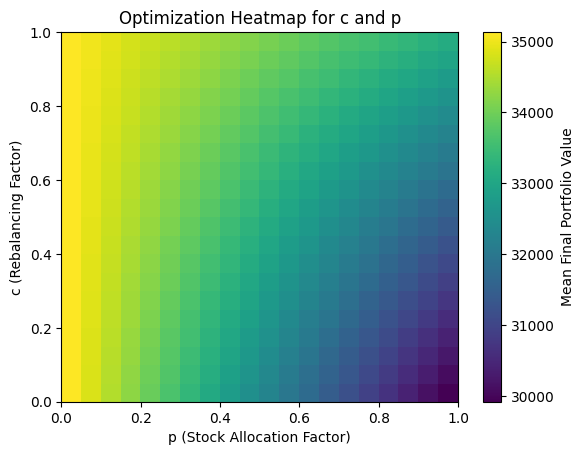

In [6]:
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt

# Vectorized simulation function
def simulate_portfolio_vectorized(returns, n_years, n_simulations, investment, p, c):
    simulated_returns = np.random.choice(returns, size=(n_simulations, n_years), replace=True)
    weights = p * (1 - c * np.arange(n_years) / n_years)  # Precompute weights
    weights = np.tile(weights, (n_simulations, 1))  # Match to simulations
    annual_returns = weights * simulated_returns + (1 - weights) * default_rf_rate
    portfolio_values = np.zeros((n_simulations, n_years + 1))
    
    # Vectorized computation of portfolio values
    for year in range(1, n_years + 1):
        portfolio_values[:, year] = (portfolio_values[:, year - 1] + investment) * (1 + annual_returns[:, year - 1])
    return portfolio_values[:, -1]

# Objective function
def compute_objective(p, c, returns, n_years, n_simulations, investment):
    final_values = simulate_portfolio_vectorized(returns, n_years, n_simulations, investment, p, c)
    return np.mean(final_values)  # Replace with other objectives if needed

# Grid search with parallelization
c_values = np.linspace(0, 1, 20)  # Reduced grid size for faster computation
p_values = np.linspace(0, 1, 20)
results = np.zeros((len(c_values), len(p_values)))

def evaluate_combination(i, j):
    p, c = p_values[j], c_values[i]
    return compute_objective(p, c, returns, n_years, n_simulations, investment)

# Parallel computation
results = Parallel(n_jobs=-1)(
    delayed(evaluate_combination)(i, j)
    for i in range(len(c_values))
    for j in range(len(p_values))
)
results = np.array(results).reshape(len(c_values), len(p_values))

# Plot the heatmap
plt.imshow(results, extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Mean Final Portfolio Value')
plt.xlabel('p (Stock Allocation Factor)')
plt.ylabel('c (Rebalancing Factor)')
plt.title('Optimization Heatmap for c and p')
plt.show()



In [10]:
from scipy.optimize import minimize
# Define the regularized objective function
def compute_objective_with_regularization(params, returns, n_years, n_simulations, investment, lambda_p=0.1, lambda_c=0.1):
    p, c = params  # Unpack optimization variables
    final_values = simulate_portfolio_vectorized(returns, n_years, n_simulations, investment, p, c)
    mean_value = np.mean(final_values)
    penalty = lambda_p * abs(p - 0.5) + lambda_c * abs(c - 0.5)  # Penalize deviation from midrange values
    return -mean_value + penalty  # Minimize negative mean with penalties

# Set bounds and initial guess
bounds = [(0.1, 0.9), (0.1, 0.9)]  # Avoid extremes for p and c
initial_guess = [0.5, 0.5]  # Start from the middle of the range

# Optimize using the corrected function
result = minimize(
    compute_objective_with_regularization,
    initial_guess,
    args=(returns, n_years, n_simulations, investment),  # Pass additional arguments here
    bounds=bounds
)

# Extract optimal values
optimal_p, optimal_c = result.x
print(f"Optimal p: {optimal_p:.3f}, Optimal c: {optimal_c:.3f}")


Optimal p: 0.500, Optimal c: 0.500


Mean final portfolio value: $33,242.75
1% quantile (worst-case): $32,450.15
Standard deviation: $373.48


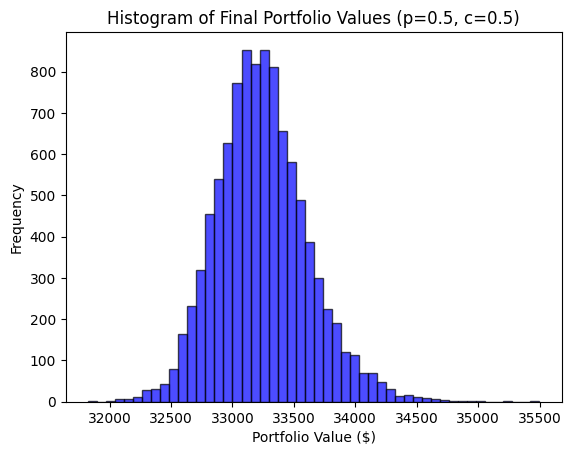

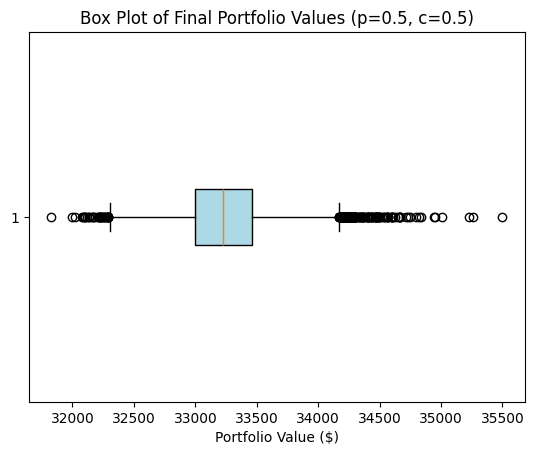

In [20]:
# Simulate portfolio with optimal p and c
optimal_p = 0.5 
optimal_c = 0.5
optimal_portfolio = simulate_portfolio_vectorized(returns, n_years, n_simulations, investment, optimal_p, optimal_c)
final_values = optimal_portfolio

# Compute key metrics
mean_value = np.mean(final_values)
quantile_1_percent = np.quantile(final_values, .01)
std_dev = np.std(final_values)

# Print key metrics
print(f"Mean final portfolio value: ${mean_value:,.2f}")
print(f"1% quantile (worst-case): ${quantile_1_percent:,.2f}")
print(f"Standard deviation: ${std_dev:,.2f}")

# Plot histogram
plt.hist(final_values, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Final Portfolio Values (p=0.5, c=0.5)')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.boxplot(final_values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Final Portfolio Values (p=0.5, c=0.5)')
plt.xlabel('Portfolio Value ($)')
plt.show()


Traditional Strategy - Mean Final Value: $34,879.57
Traditional Strategy - 1% Quantile: $34,749.88
Traditional Strategy - Standard Deviation: $60.90


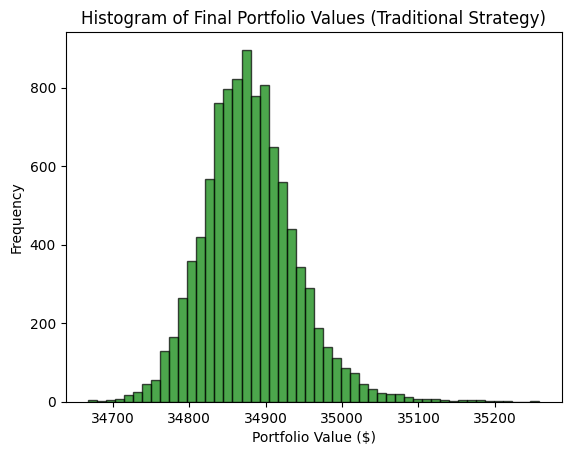

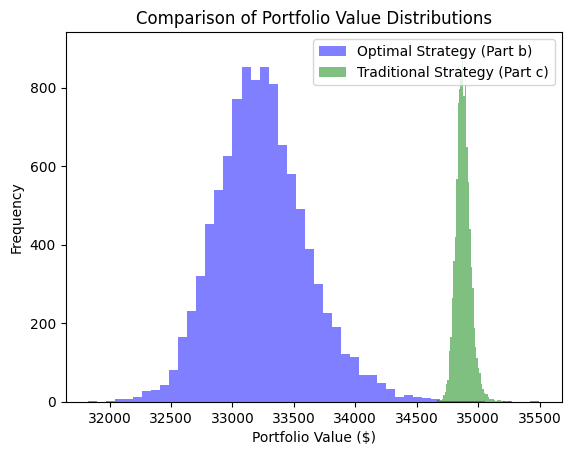

In [21]:
# More in depth review of c 

# Traditional life insurance simulation function
def simulate_traditional_life_insurance(empirical_returns, n_years, n_simulations, investment, guaranteed_rate):
    simulated_returns = np.random.choice(empirical_returns, size=(n_simulations, n_years), replace=True)
    portfolio_values = np.zeros((n_simulations, n_years + 1))
    guaranteed_values = np.zeros(n_years + 1)
    
    # Compute guaranteed values
    for year in range(1, n_years + 1):
        guaranteed_values[year] = guaranteed_values[year - 1] + investment * np.exp(guaranteed_rate * year)
    
    # Simulate portfolio values
    for sim in range(n_simulations):
        for year in range(1, n_years + 1):
            risk_free_investment = guaranteed_values[year] * np.exp(-guaranteed_rate)
            risky_investment = portfolio_values[sim, year - 1] + investment - risk_free_investment
            annual_return = simulated_returns[sim, year - 1]
            portfolio_values[sim, year] = (
                risk_free_investment * (1 + default_rf_rate) +
                risky_investment * (1 + annual_return)
            )
    
    return portfolio_values

# Parameters
guaranteed_rate = 0.005  # Guaranteed return
portfolio_c = simulate_traditional_life_insurance(returns, n_years, n_simulations, investment, guaranteed_rate)
final_values_c = portfolio_c[:, -1]

# Metrics
mean_value_c = np.mean(final_values_c)
quantile_1_percent_c = np.quantile(final_values_c, 0.01)
std_dev_c = np.std(final_values_c)

# Print metrics
print(f"Traditional Strategy - Mean Final Value: ${mean_value_c:,.2f}")
print(f"Traditional Strategy - 1% Quantile: ${quantile_1_percent_c:,.2f}")
print(f"Traditional Strategy - Standard Deviation: ${std_dev_c:,.2f}")

# Histogram
plt.hist(final_values_c, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Histogram of Final Portfolio Values (Traditional Strategy)')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.show()

# Comparison with optimal strategy (Part b)
plt.hist(final_values, bins=50, alpha=0.5, label='Optimal Strategy (Part b)', color='blue')
plt.hist(final_values_c, bins=50, alpha=0.5, label='Traditional Strategy (Part c)', color='green')
plt.title('Comparison of Portfolio Value Distributions')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Leveraged CPPI Strategy - Mean Final Value: $10,714,365,860.78
Leveraged CPPI Strategy - 1% Quantile: $9,497,498,656.53
Leveraged CPPI Strategy - Standard Deviation: $589,564,971.05


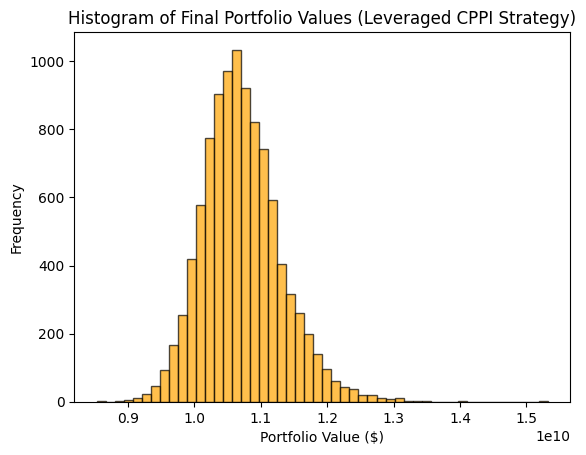

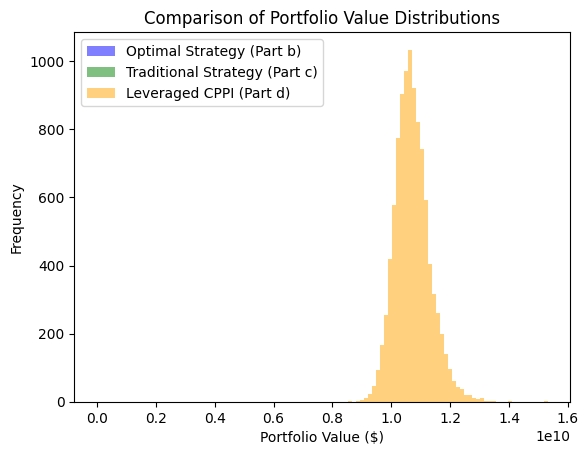

In [22]:
# Leveraged CPPI simulation function
def simulate_leveraged_cppi(empirical_returns, n_years, n_simulations, investment, guaranteed_rate):
    simulated_returns = np.random.choice(empirical_returns, size=(n_simulations, n_years), replace=True)
    portfolio_values = np.zeros((n_simulations, n_years + 1))
    guaranteed_values = np.zeros(n_years + 1)

    # Compute guaranteed values
    for year in range(1, n_years + 1):
        guaranteed_values[year] = guaranteed_values[year - 1] + investment * np.exp(guaranteed_rate * year)

    # Simulate portfolio values
    for sim in range(n_simulations):
        for year in range(1, n_years + 1):
            risk_free_investment = guaranteed_values[year] * np.exp(-guaranteed_rate)
            surplus = portfolio_values[sim, year - 1] + investment - risk_free_investment
            risky_investment = max(2 * surplus, 0)  # Leverage factor of 2
            annual_return = simulated_returns[sim, year - 1]

            # Calculate portfolio value
            portfolio_values[sim, year] = (
                risk_free_investment * (1 + default_rf_rate) +
                risky_investment * (1 + annual_return)
            )

            # Enforce guarantee
            if portfolio_values[sim, year] < guaranteed_values[year]:
                portfolio_values[sim, year] = guaranteed_values[year]

    return portfolio_values

# Parameters
guaranteed_rate = 0.005  # Guaranteed return
portfolio_d = simulate_leveraged_cppi(returns, n_years, n_simulations, investment, guaranteed_rate)
final_values_d = portfolio_d[:, -1]

# Metrics
mean_value_d = np.mean(final_values_d)
quantile_1_percent_d = np.quantile(final_values_d, 0.01)
std_dev_d = np.std(final_values_d)

# Print metrics
print(f"Leveraged CPPI Strategy - Mean Final Value: ${mean_value_d:,.2f}")
print(f"Leveraged CPPI Strategy - 1% Quantile: ${quantile_1_percent_d:,.2f}")
print(f"Leveraged CPPI Strategy - Standard Deviation: ${std_dev_d:,.2f}")

# Histogram
plt.hist(final_values_d, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Histogram of Final Portfolio Values (Leveraged CPPI Strategy)')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.show()

# Comparison with traditional and optimal strategies
plt.hist(final_values, bins=50, alpha=0.5, label='Optimal Strategy (Part b)', color='blue')
plt.hist(final_values_c, bins=50, alpha=0.5, label='Traditional Strategy (Part c)', color='green')
plt.hist(final_values_d, bins=50, alpha=0.5, label='Leveraged CPPI (Part d)', color='orange')
plt.title('Comparison of Portfolio Value Distributions')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
